In [1]:
%load_ext autoreload
%autoreload 2
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

In [197]:
import numpy as np
import pandas as pd
from pathlib import Path

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio, IFrame, display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from PIL import Image

import sys
sys.path.append('../easy_gold')

import utils
import datasets
import audio_augmentation

In [3]:
df = pd.read_csv('../data/train.csv')
data_dir = Path('../data/train_resampled_with_nocall/')

In [40]:
SAMPLE_RATE = 32000

In [4]:
ds = datasets.SpectrogramDataset(df, data_dir)

In [6]:
ds[0]

{'image': array([-0.00704956, -0.00796509, -0.00640869, ..., -0.00262451,
        -0.009552  , -0.01119995], dtype=float32),
 'targets': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
y = ds[0]['image']

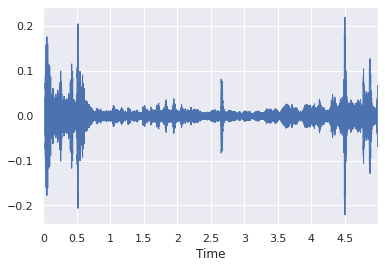

In [41]:
librosa.display.waveplot(y, sr=SAMPLE_RATE)

In [43]:
Audio(y, rate=SAMPLE_RATE)

In [24]:
# melspec = librosa.feature.melspectrogram(y, sr=32000)
melspec = librosa.feature.melspectrogram(y, sr=32000, n_mels=128, fmin=20, fmax=16000)

In [25]:
melspec

array([[5.0458270e-06, 2.1121757e-06, 1.1589460e-06, ..., 2.1360447e-07,
        3.3031802e-06, 1.1480740e-04],
       [7.8592093e-06, 4.8538277e-06, 3.5577950e-06, ..., 1.0684055e-07,
        3.4420934e-06, 1.2341123e-04],
       [3.7484006e-06, 1.1389070e-06, 7.7944867e-07, ..., 1.5491592e-06,
        6.6592202e-06, 1.2555247e-04],
       ...,
       [1.3489552e-05, 1.8046170e-05, 2.9742749e-05, ..., 9.3528242e-06,
        1.2165890e-05, 1.1476369e-04],
       [9.7601287e-06, 1.1576200e-05, 1.4497243e-05, ..., 7.1598010e-06,
        8.6845448e-06, 9.1619033e-05],
       [6.8753110e-07, 7.7972038e-07, 9.8466046e-07, ..., 6.0800397e-07,
        3.0951589e-06, 8.3757877e-05]], dtype=float32)

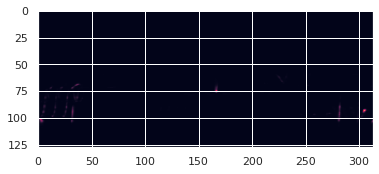

In [26]:
plt.imshow(melspec)

In [27]:
mel_power = librosa.power_to_db(melspec).astype(np.float32)

In [35]:
mel_power

array([[-52.970676, -56.7527  , -59.359367, ..., -66.703896, -54.810677,
        -39.4003  ],
       [-51.04621 , -53.139156, -54.48819 , ..., -69.71264 , -54.63177 ,
        -39.086452],
       [-54.261543, -59.43512 , -61.082123, ..., -58.09904 , -51.765766,
        -39.01175 ],
       ...,
       [-48.700024, -47.43615 , -45.26619 , ..., -50.29057 , -49.14856 ,
        -39.401955],
       [-50.105442, -49.364338, -48.387146, ..., -51.450993, -50.61253 ,
        -40.380142],
       [-61.62708 , -61.080612, -60.067135, ..., -62.160934, -55.09317 ,
        -40.769745]], dtype=float32)

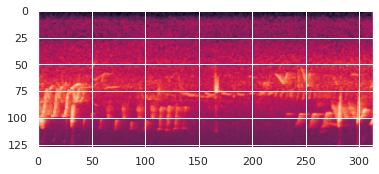

In [36]:
plt.imshow(mel_power)

In [30]:
color_image = utils.mono_to_color(mel_power)

In [33]:
color_image.shape

(128, 313, 3)

In [34]:
color_image

array([[[ 57,  57,  57],
        [ 45,  45,  45],
        [ 37,  37,  37],
        ...,
        [ 14,  14,  14],
        [ 52,  52,  52],
        [101, 101, 101]],

       [[ 64,  64,  64],
        [ 57,  57,  57],
        [ 53,  53,  53],
        ...,
        [  4,   4,   4],
        [ 52,  52,  52],
        [102, 102, 102]],

       [[ 53,  53,  53],
        [ 37,  37,  37],
        [ 32,  32,  32],
        ...,
        [ 41,  41,  41],
        [ 61,  61,  61],
        [102, 102, 102]],

       ...,

       [[ 71,  71,  71],
        [ 75,  75,  75],
        [ 82,  82,  82],
        ...,
        [ 66,  66,  66],
        [ 70,  70,  70],
        [101, 101, 101]],

       [[ 67,  67,  67],
        [ 69,  69,  69],
        [ 72,  72,  72],
        ...,
        [ 62,  62,  62],
        [ 65,  65,  65],
        [ 98,  98,  98]],

       [[ 30,  30,  30],
        [ 32,  32,  32],
        [ 35,  35,  35],
        ...,
        [ 28,  28,  28],
        [ 51,  51,  51],
        [ 96,  96,  96]]

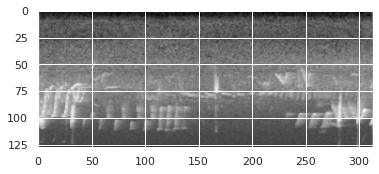

In [32]:
plt.imshow(color_image)

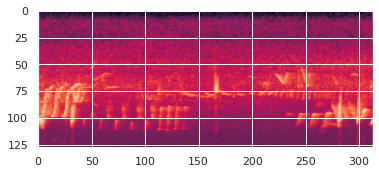

In [37]:
plt.imshow(utils.normalize_image(mel_power))

In [45]:
def noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [47]:
y_noise = noise(y, 0.01)

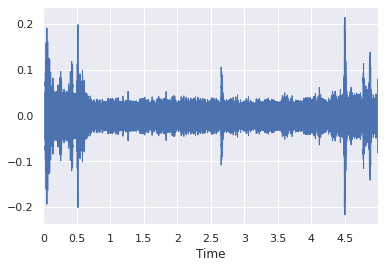

In [48]:
librosa.display.waveplot(y_noise,sr=SAMPLE_RATE)

In [49]:
Audio(y_noise, rate=SAMPLE_RATE)

In [55]:
def shifting_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

In [61]:
y_shift = shifting_time(y, SAMPLE_RATE, 1, 'both')

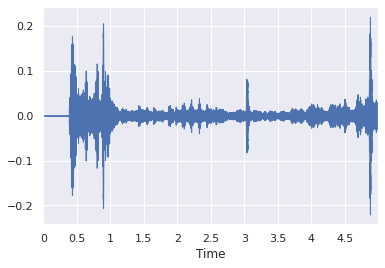

In [62]:
librosa.display.waveplot(y_shift, sr=SAMPLE_RATE)

In [63]:
Audio(y_shift, rate=SAMPLE_RATE)

In [64]:
def speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)

In [65]:
y_speed = speed(y, 2)

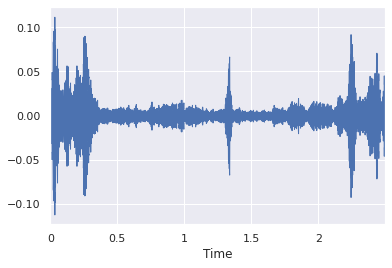

In [66]:
librosa.display.waveplot(y_speed, sr=SAMPLE_RATE)

In [67]:
Audio(y_speed, rate=SAMPLE_RATE)

In [68]:
def pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [72]:
y_pitch = pitch(y, SAMPLE_RATE, 4)

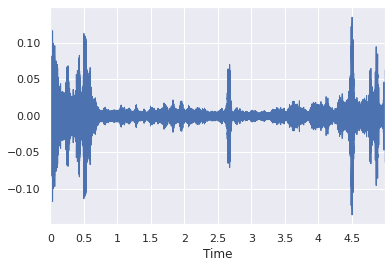

In [73]:
librosa.display.waveplot(y_pitch, sr=SAMPLE_RATE)

In [74]:
Audio(y_pitch, rate=SAMPLE_RATE)

In [202]:
wave_transformer = audio_augmentation.get_train_transforms()

In [203]:
len(y)

160000

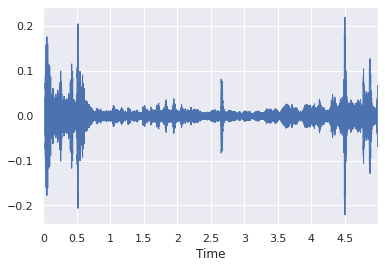

In [205]:
librosa.display.waveplot(y, sr=SAMPLE_RATE)

In [221]:
y_transed = wave_transformer(data=y)['data']

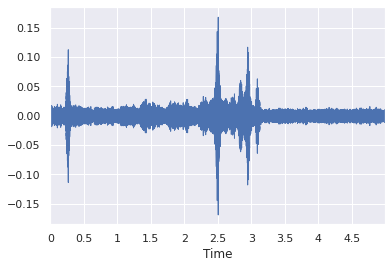

In [222]:
librosa.display.waveplot(y_transed, sr=SAMPLE_RATE)

In [223]:
getattr(audio_augmentation, 'TimeShifting')

audio_augmentation.TimeShifting

In [225]:
print(globals())

NotImplementedError: Class audio_augmentation.TimeShifting is not serializable because the `get_transform_init_args_names` method is not implemented